In [44]:
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\RaYa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


# Part One

### Load Dataset

In [45]:
FILE_NAME = 'GooglePlay.csv'
# Assuming the dataset is in a CSV file named 'dataset.csv'
df = pd.read_csv(FILE_NAME)

In [46]:
df.shape
df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Clean Dataset

In [47]:
# Remove non-numeric characters from the 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with NaN values in the 'Installs' column
df = df.dropna(subset=['Installs'])
df = df.dropna(subset=['Reviews'])
df = df.dropna(subset=['Ra'])

# Remove non-numeric characters from the 'Reviews' column
df['Reviews'] = pd.to_numeric(df['Reviews'].str.replace(',', ''), errors='coerce')

C:\Users\RaYa\AppData\Local\Temp\ipykernel_16732\2850760274.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')


### Store Cleaned Dataset

In [48]:
# Store the cleaned dataset in a new file named 'cleaned_dataset.csv'
df.to_csv('cleaned_dataset.csv', index=False)

# Display a message to indicate the file has been saved
print("The cleaned dataset has been saved to 'cleaned_dataset.csv'.")

The cleaned dataset has been saved to 'cleaned_dataset.csv'.


In [49]:
# Function to calculate characteristics
def calculate_characteristics(df, column_name):
    characteristics = {
        'Outlier': None, # Outlier calculation depends on the context
        'Median': df[column_name].median(),
        'Mode': df[column_name].mode()[0] if df[column_name].mode().size > 0 else None,
        'Mean': df[column_name].mean(),
        'Max': df[column_name].max(),
        'Min': df[column_name].min(),
        'Range': df[column_name].max() - df[column_name].min(),
        'Type': 'Discrete' if df[column_name].dtype == 'int64' else 'Continuous',
        'Feature Name': column_name
    }
    return characteristics

### Calculate characteristics for each numerical column

In [50]:
numerical_columns = ['Rating', 'Reviews' , 'Installs']
for column in numerical_columns:
    characteristics = calculate_characteristics(df, column)
    print(f"Characteristics for {column}:")
    print(characteristics)
    print("\n")

Characteristics for Rating:
{'Outlier': None, 'Median': 4.3, 'Mode': 4.4, 'Mean': 4.191757420456972, 'Max': 5.0, 'Min': 1.0, 'Range': 4.0, 'Type': 'Continuous', 'Feature Name': 'Rating'}


Characteristics for Reviews:
{'Outlier': None, 'Median': 2094.0, 'Mode': 0, 'Mean': 444152.89603321033, 'Max': 78158306, 'Min': 0, 'Range': 78158306, 'Type': 'Discrete', 'Feature Name': 'Reviews'}


Characteristics for Installs:
{'Outlier': None, 'Median': 100000.0, 'Mode': 1000000.0, 'Mean': 15464338.882564576, 'Max': 1000000000.0, 'Min': 0.0, 'Range': 1000000000.0, 'Type': 'Continuous', 'Feature Name': 'Installs'}




In [51]:
df.describe()

,Unnamed: 0,Rating,Reviews,Installs
count,10840.000000,9366.000000,1.084000e+04,1.084000e+04
mean,5419.533948,4.191757,4.441529e+05,1.546434e+07
std,3129.439605,0.515219,2.927761e+06,8.502936e+07
min,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,2709.750000,4.000000,3.800000e+01,1.000000e+03
50%,5419.500000,4.300000,2.094000e+03,1.000000e+05
75%,8129.250000,4.500000,5.477550e+04,5.000000e+06
max,10840.000000,5.000000,7.815831e+07,1.000000e+09


### Plot Outer Values for each feature

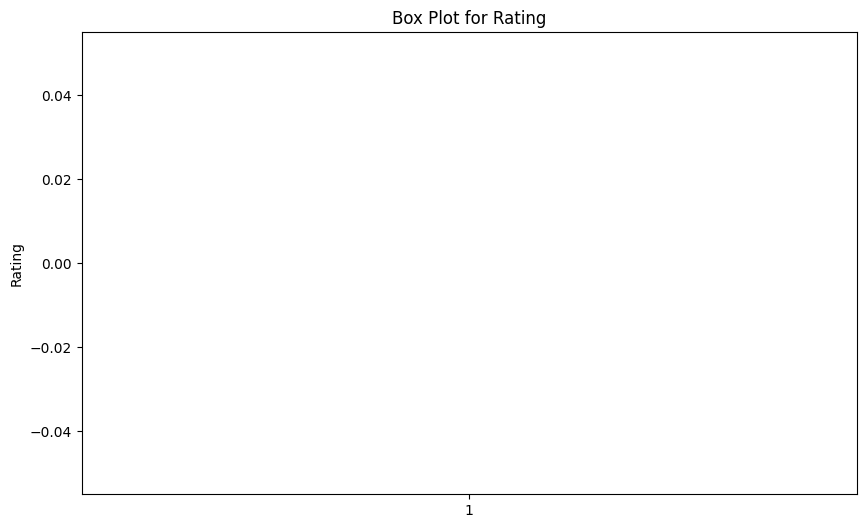

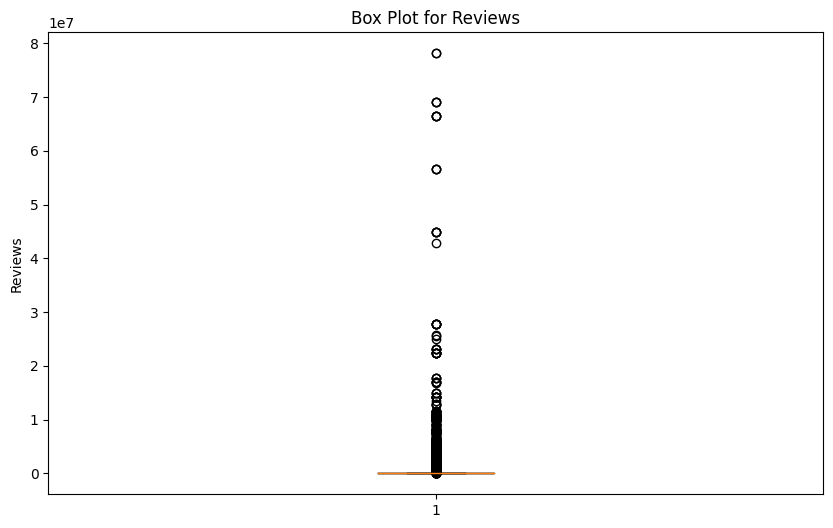

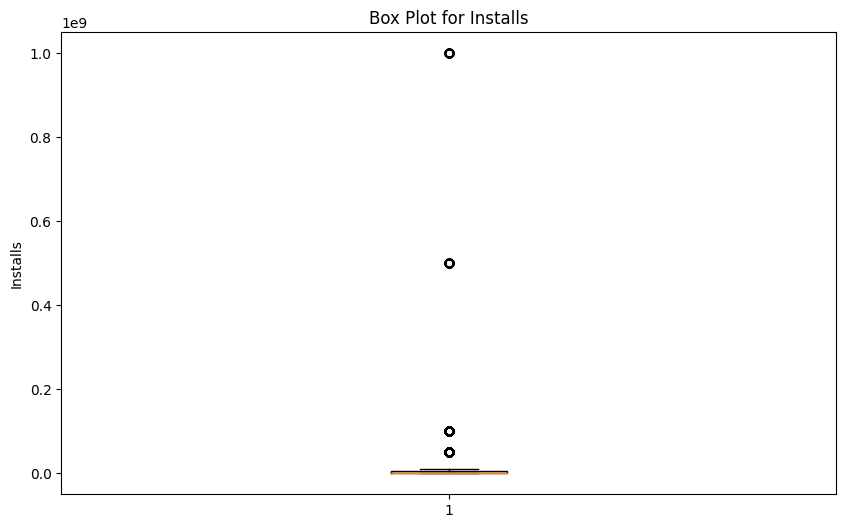

In [52]:
# Function to plot Box Plots for each numerical column
def plot_boxplot(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column_name])
    plt.title(f"Box Plot for {column_name}")
    plt.ylabel(column_name)
    plt.show()

# Plot Box Plots for each numerical column
for column in numerical_columns:
    plot_boxplot(df, column)

In [54]:
df["Reviews"].info

<bound method Series.info of 0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64>